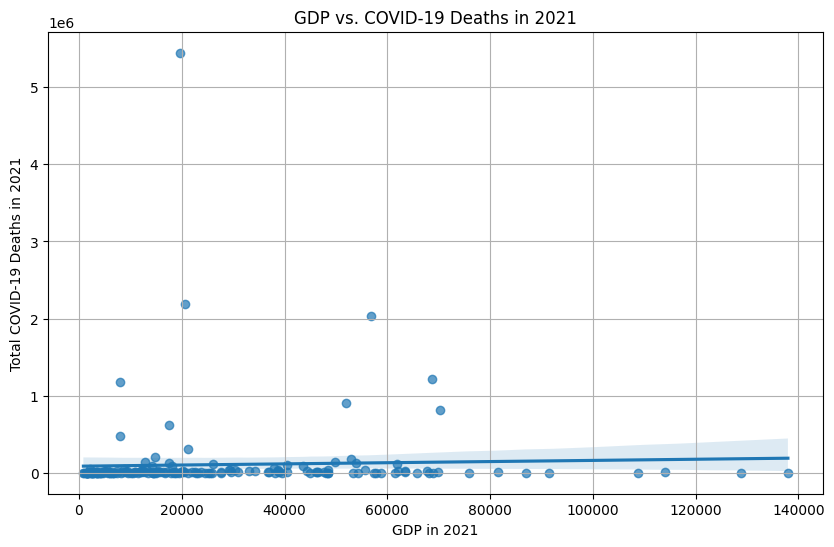

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]
covid_deaths_2021 = covid_2021_df.groupby('location').last()['total_deaths_per_million'].reset_index()


gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

merged_df = pd.merge(covid_deaths_2021, gdp_df, on='location', how='inner')

#merged_df = merged_df[merged_df['location'] != 'World'] 


plt.figure(figsize=(10, 6))
sns.regplot(
    x='2021',
    y='total_deaths_per_million', 
    data=merged_df, 
    scatter_kws={'alpha':0.7}
)

# Customizing the plot
plt.title('GDP vs. COVID-19 Deaths in 2021')
plt.xlabel('GDP in 2021')
plt.ylabel('Total COVID-19 Deaths in 2021')
plt.grid(True)  # Adding grid

# Display the plot
plt.show()

fig = go.Figure(data=go.Scatter(
    x=merged_df['2021'],
    y=merged_df['total_deaths_per_million'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',  # You can set a color if needed
        opacity=0.8,
        
    ),
    text=merged_df['location']
))

# Customize layout
fig.update_layout(
    title='GDP vs. COVID-19 Deaths in 2021',
    xaxis_title='GDP in 2021',
    yaxis_title='Total COVID-19 Deaths in 2021',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

# Show the plot
fig.show()
x_value = covid_2021_df.groupby('location').last()['people_vaccinated_per_hundred'].reset_index()
y_value = covid_2021_df.groupby('location').last()['excess_mortality_cumulative_per_million'].reset_index()

# Creating the figure
fig2 = go.Figure(data=go.Scatter(
    x=x_value['people_vaccinated_per_hundred'],
    y=y_value['excess_mortality_cumulative_per_million'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',  # You can set a color if needed
        opacity=0.8,
    ),
    text=covid_2021_df['location'].iloc[-1]  # Assuming 'location' is the country name
))

# Customize layout
fig2.update_layout(
    title='Excess mortality rate vs. People vaccinated per hundred in 2021',
    xaxis_title='People vaccinated per hundred in 2021',
    yaxis_title='Excess mortality per mil in 2021',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

# Show the plot
fig2.show()
income_categories = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

filtered_df = covid_2021_df[covid_2021_df['location'].isin(income_categories)]

aggregated_df = filtered_df.groupby('location').last()['total_cases_per_million'].reset_index()

trace = go.Bar(
    x=aggregated_df['location'],
    y=aggregated_df['total_cases_per_million']
)

layout = go.Layout(
    title='Total Cases per Million by Income Category',
    xaxis=dict(title='Income Category'),
    yaxis=dict(title='Total Cases per Million')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

fig3 = px.box(
    merged_df, 
    x='2021', 
    y='total_deaths_per_million', 
    title='Customized Interactive Box Plot',
    color='Category',  # Different colors for each category
    points="all"  # Show all points
)
fig3.update_layout(
    xaxis_title='Your Category',
    yaxis_title='Your Value'
)
fig3.show()